#### Question 2:

#### Name:Pranav
#### Regno:2347137

#### Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process.

Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).

Data Loading and preprocessing

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D:/@5trisem/NN/Tweets.csv")

# Preprocess the data
X = data['text']
y = data['airline_sentiment']

# Keep only positive and negative sentiments for binary classification
data = data[data['airline_sentiment'] != 'neutral']

# Encode labels: 1 for positive, 0 for negative
le = LabelEncoder()
y = le.fit_transform(y)

# Use TfidfVectorizer for better performance over CountVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X).toarray()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Defining Activation functions

In [8]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

Creating A neural Network class

In [9]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights with better scaling
        self.weights_ih = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2.0/self.input_size)
        self.bias_h = np.zeros((1, self.hidden_size))
        self.weights_ho = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2.0/self.hidden_size)
        self.bias_o = np.zeros((1, self.output_size))
        
        # Set the activation function for hidden layer
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
    
    def forward(self, X):
        self.hidden = self.activation(np.dot(X, self.weights_ih) + self.bias_h)
        self.output = sigmoid(np.dot(self.hidden, self.weights_ho) + self.bias_o)  # Always use sigmoid for output layer
        return self.output
    
    def backward(self, X, y, output, learning_rate):
        # Calculate the error
        self.error = y - output
        d_output = self.error * sigmoid_derivative(output)  # Sigmoid derivative for output layer
        
        # Backpropagate the error to the hidden layer
        error_hidden = np.dot(d_output, self.weights_ho.T)
        d_hidden = error_hidden * self.activation_derivative(self.hidden)
        
        # Update weights and biases
        self.weights_ho += learning_rate * np.dot(self.hidden.T, d_output)
        self.bias_o += learning_rate * np.sum(d_output, axis=0, keepdims=True)
        self.weights_ih += learning_rate * np.dot(X.T, d_hidden)
        self.bias_h += learning_rate * np.sum(d_hidden, axis=0, keepdims=True)
    
    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            loss = np.mean(np.square(y - output))
            losses.append(loss)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
        return losses
    
    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)


Traing and evaluating the model

Epoch 0, Loss: 0.5739141049875751
Epoch 100, Loss: 0.8653517759562842
Epoch 200, Loss: 0.8653517759562842
Epoch 300, Loss: 0.8653517759562842
Epoch 400, Loss: 0.8653517759562842
Epoch 500, Loss: 0.8653517759562842
Epoch 600, Loss: 0.8653517759562842
Epoch 700, Loss: 0.8653517759562842
Epoch 800, Loss: 0.8653517759562842
Epoch 900, Loss: 0.8653517759562842

Sigmoid Activation:
Train Accuracy: 0.6224
Test Accuracy: 0.6452


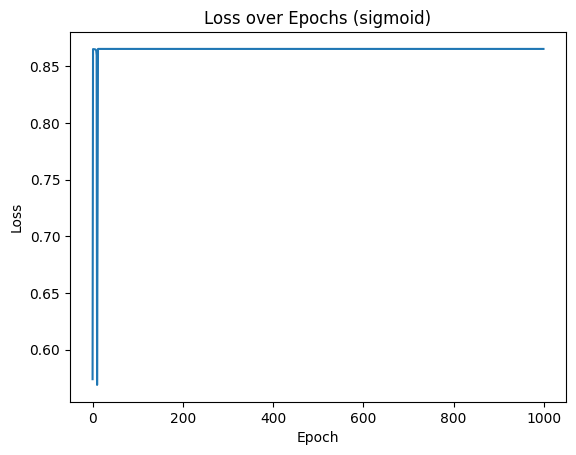

Epoch 0, Loss: 0.5764631481203678
Epoch 100, Loss: 0.8653517759562842
Epoch 200, Loss: 0.8653517759562842
Epoch 300, Loss: 0.8653517759562842
Epoch 400, Loss: 0.8653517759562842
Epoch 500, Loss: 0.8653517759562842
Epoch 600, Loss: 0.8653517759562842
Epoch 700, Loss: 0.8653517759562842
Epoch 800, Loss: 0.8653517759562842
Epoch 900, Loss: 0.8653517759562842

Relu Activation:
Train Accuracy: 0.6224
Test Accuracy: 0.6452


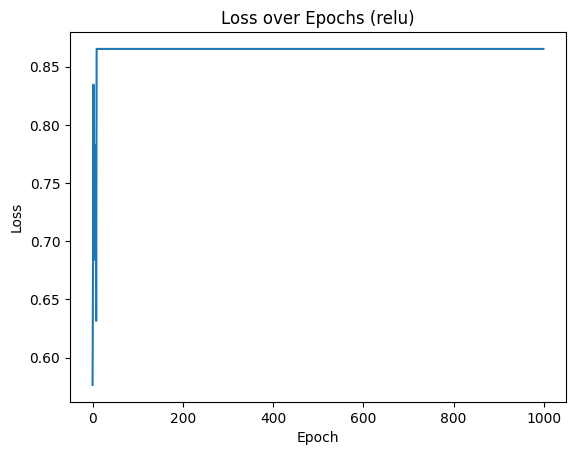

Epoch 0, Loss: 0.5757035598539556
Epoch 100, Loss: 0.865351774403319
Epoch 200, Loss: 0.865351774399975
Epoch 300, Loss: 0.8653517743966166
Epoch 400, Loss: 0.8653517743932436
Epoch 500, Loss: 0.8653517743898558
Epoch 600, Loss: 0.8653517743864534
Epoch 700, Loss: 0.865351774383036
Epoch 800, Loss: 0.8653517743796036
Epoch 900, Loss: 0.8653517743761564

Tanh Activation:
Train Accuracy: 0.6224
Test Accuracy: 0.6452


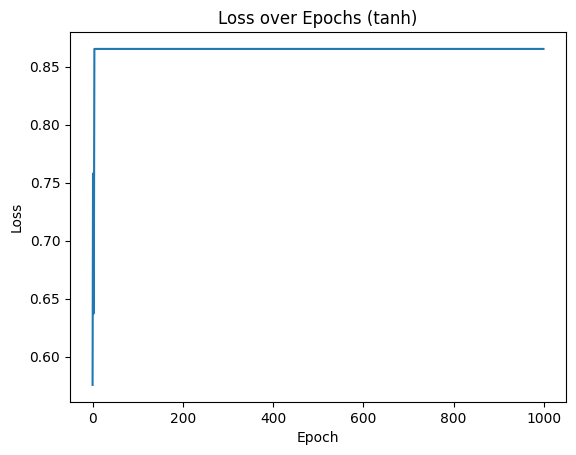

In [10]:
def train_and_evaluate(activation):
    model = NeuralNetwork(input_size=X_train.shape[1], hidden_size=64, output_size=1, activation=activation)
    losses = model.train(X_train, y_train.reshape(-1, 1), epochs=1000, learning_rate=0.01)
    
    train_accuracy = np.mean(model.predict(X_train) == y_train.reshape(-1, 1))
    test_accuracy = np.mean(model.predict(X_test) == y_test.reshape(-1, 1))
    
    print(f'\n{activation.capitalize()} Activation:')
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    plt.plot(losses)
    plt.title(f'Loss over Epochs ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# Train and evaluate the model with different activation functions
for activation in ['sigmoid', 'relu', 'tanh']:
    train_and_evaluate(activation)


Visualization

In [17]:
def plot_accuracy_and_loss(accuracies, losses, activation):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title(f'Loss over Epochs ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.title(f'Accuracy over Epochs ({activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    
    plt.show()


# Sentiment Analysis Classification Model Interpretataion

## Objective
The goal of this project is to develop a sentiment analysis model using a feed-forward neural network to classify sentiments (positive or negative) from a dataset of tweets.

## Dataset
The **Twitter Airline Sentiment** dataset is utilized, focusing on positive and negative sentiments by filtering out neutral responses. The text data is preprocessed using TF-IDF vectorization, and sentiment labels are encoded for binary classification.

## Neural Network Design
A neural network is designed with:
- Input layer corresponding to the number of features (words).
- One hidden layer with configurable activation functions (Sigmoid, ReLU, Tanh).
- Output layer using the Sigmoid activation function for binary classification.

## Training Process
The model is trained using backpropagation, where weights are updated based on the error between predicted and actual sentiments. The training process involves tracking loss over epochs to assess model performance.

## Evaluation
The model's performance is evaluated based on training and test accuracy for different activation functions. 

## Visualization
Loss and accuracy are plotted over epochs to visualize the training process and compare the effectiveness of each activation function.

## Conclusion
The project successfully demonstrates how to implement a neural network for sentiment classification, showcasing the importance of activation functions and backpropagation in training a model.
